In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings(action='ignore')

In [71]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [73]:
df.drop_duplicates(inplace = True)

<Axes: ylabel='count'>

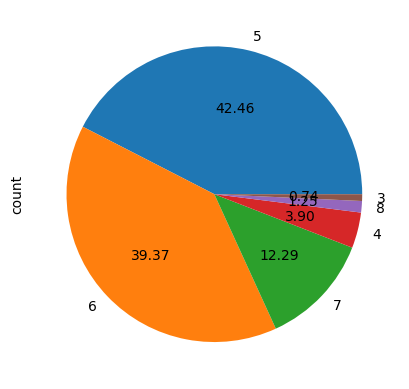

In [74]:
df['quality'].value_counts().plot(kind = 'pie' , autopct='%0.2f')

In [75]:
df['quality'] = [1 if val >=7 else 0 for val in df['quality']]

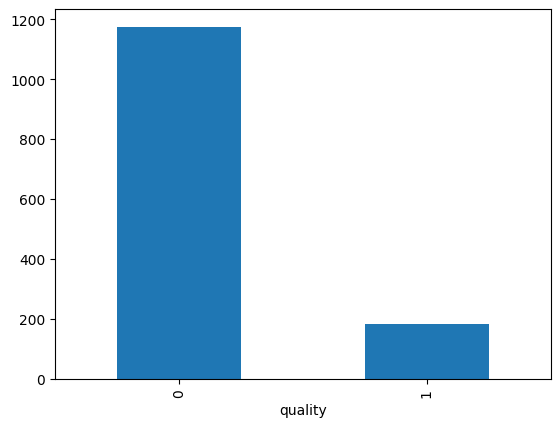

In [76]:
df['quality'].value_counts().plot(kind = 'bar')
plt.show()

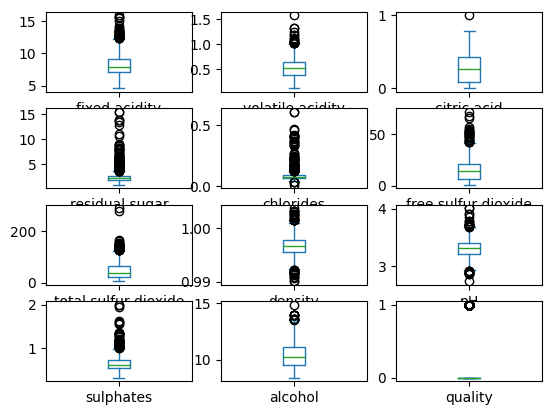

In [77]:
df.plot(kind = 'box' , subplots = True , layout = (4,3) , sharex = False)
plt.show()

In [78]:
def cap_data(df):
    df_copy = df.copy()  
    for col in df_copy.columns:
        print("capping the", col)
        if df_copy[col].dtype in [float, int]:  # No need for separate checks
            percentiles = df_copy[col].quantile([0.25, 0.75]).values
            df_copy[col][df_copy[col] <= percentiles[0]] = percentiles[0]
            df_copy[col][df_copy[col] >= percentiles[1]] = percentiles[1]
    return df_copy

In [79]:
final_df = cap_data(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
final_df['quality'] = df['quality'].copy()

capping the fixed acidity
capping the volatile acidity
capping the citric acid
capping the residual sugar
capping the chlorides
capping the free sulfur dioxide
capping the total sulfur dioxide
capping the density
capping the pH
capping the sulphates
capping the alcohol


In [82]:
items = [] 

for col in final_df.drop('quality', axis=1).columns:
    items.append(df[col].mean())

items_array = np.array(items).reshape(1, -1)

ingredient_dataframe = pd.DataFrame(items_array, columns=final_df.drop('quality', axis=1).columns)
ingredient_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.310596,0.529478,0.272333,2.5234,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315


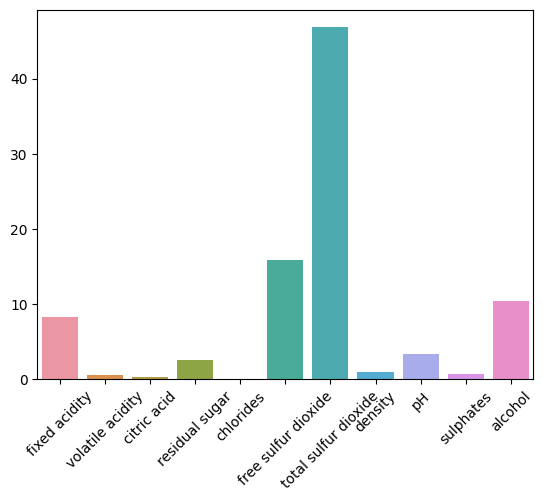

In [89]:
ax = sns.barplot(data=ingredient_dataframe)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
plt.show()

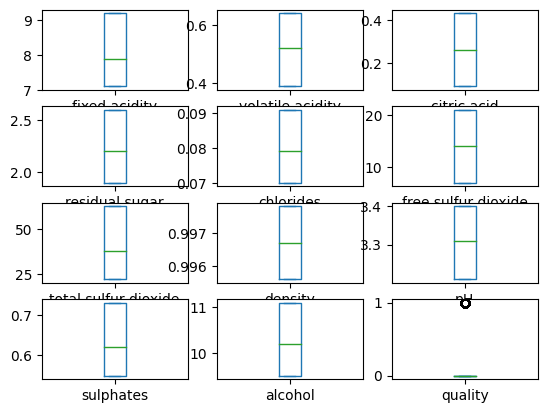

In [19]:
final_df.plot(kind = 'box' , subplots = True , layout = (4,3) , sharex = False)
plt.show()

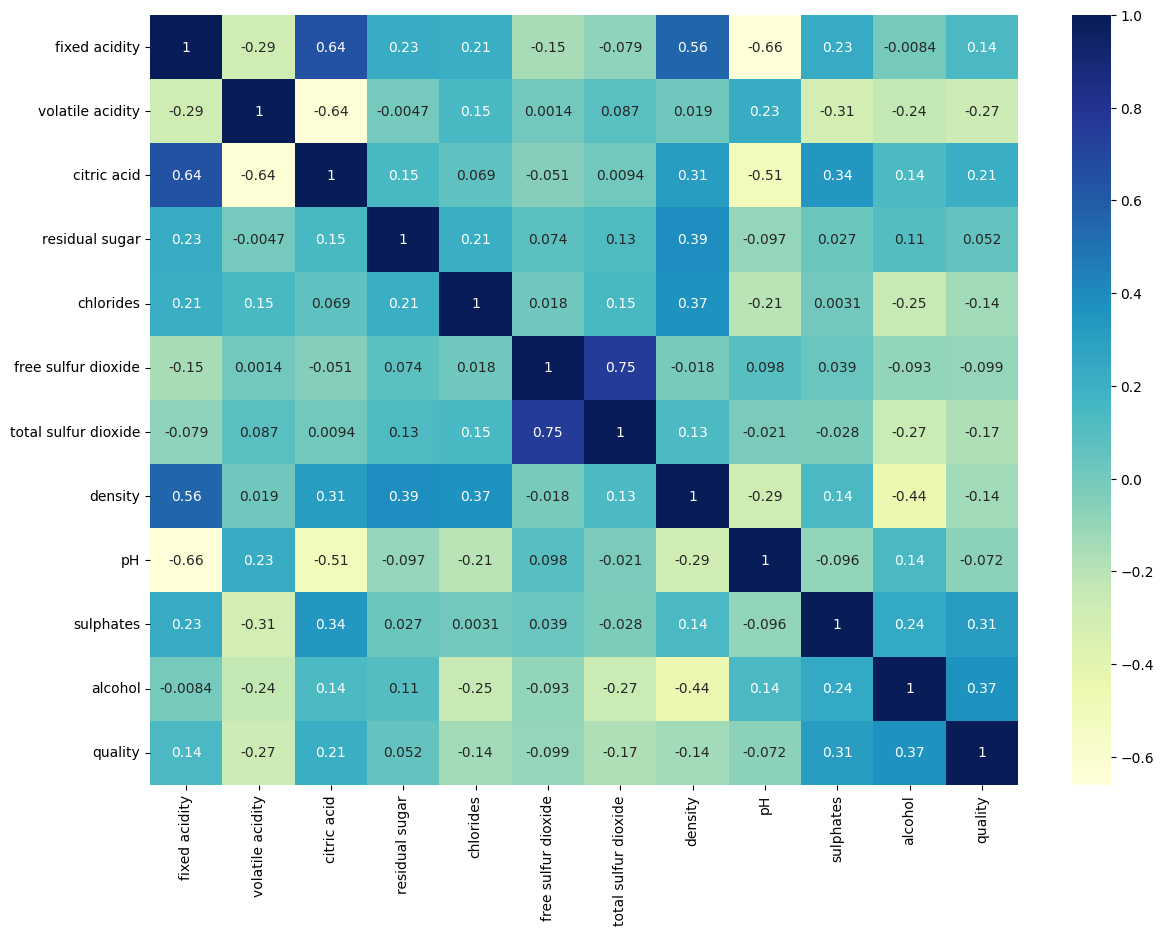

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(final_df.corr() , annot=True , cmap='YlGnBu')
plt.show()

In [21]:
X_train , X_test , y_train , y_test = train_test_split(final_df.drop(['quality'] , axis = 1) ,
                                                       final_df['quality'] , random_state=45 ,
                                                       test_size=0.1)

In [22]:
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset , threshold):
    
     # Input validation
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input 'dataset' must be a pandas DataFrame.")
    if not (-1 <= threshold <= 1):
        raise ValueError("Threshold must be between -1 and 1.")
        
    col_corr = set() # set of all the names of correlated column
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # Getting the name of the colummn
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(X_train , 0.8)
len(set(corr_features))

0

In [26]:
scaler = MinMaxScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,IsolationForest,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [28]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
ifc = IsolationForest(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
cat = CatBoostClassifier(n_estimators=50,random_state=2)
lgb = LGBMClassifier(n_estimators=50,random_state=2)

In [29]:
classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ifc': ifc,
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [30]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    
    return accuracy, precision


In [33]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_trf,y_train,X_test_trf,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7720588235294118
Precision -  0.77805239742956
For  KN
Accuracy -  0.9191176470588235
Precision -  0.9170312753200455
For  NB
Accuracy -  0.8823529411764706
Precision -  0.7785467128027681
For  DT
Accuracy -  0.8897058823529411
Precision -  0.8927335640138407
For  LR
Accuracy -  0.9117647058823529
Precision -  0.9073563851770218
For  RF
Accuracy -  0.8823529411764706
Precision -  0.8700189753320683
For  ifc
Accuracy -  0.0
Precision -  0.0
For  AdaBoost
Accuracy -  0.9117647058823529
Precision -  0.9117647058823529
For  BgC
Accuracy -  0.8897058823529411
Precision -  0.8867606546750931
For  ETC
Accuracy -  0.875
Precision -  0.8649155722326455
For  GBDT
Accuracy -  0.8970588235294118
Precision -  0.8869386464263124
For  xgb
Accuracy -  0.8897058823529411
Precision -  0.8811389471360777
Learning rate set to 0.175109
0:	learn: 0.6095490	total: 148ms	remaining: 7.23s
1:	learn: 0.5463367	total: 149ms	remaining: 3.58s
2:	learn: 0.4987047	total: 151ms	remaining: 2.36s


In [36]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores , 'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.772059,0.778052
1,KN,0.919118,0.917031
2,NB,0.882353,0.778547
3,DT,0.889706,0.892734
4,LR,0.911765,0.907356
5,RF,0.882353,0.870019
6,ifc,0.000000,0.000000
7,AdaBoost,0.911765,0.911765
8,BgC,0.889706,0.886761
9,ETC,0.875000,0.864916


In [37]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.772059
1,KN,Accuracy,0.919118
2,NB,Accuracy,0.882353
3,DT,Accuracy,0.889706
4,LR,Accuracy,0.911765
5,RF,Accuracy,0.882353
6,ifc,Accuracy,0.000000
7,AdaBoost,Accuracy,0.911765
8,BgC,Accuracy,0.889706
9,ETC,Accuracy,0.875000


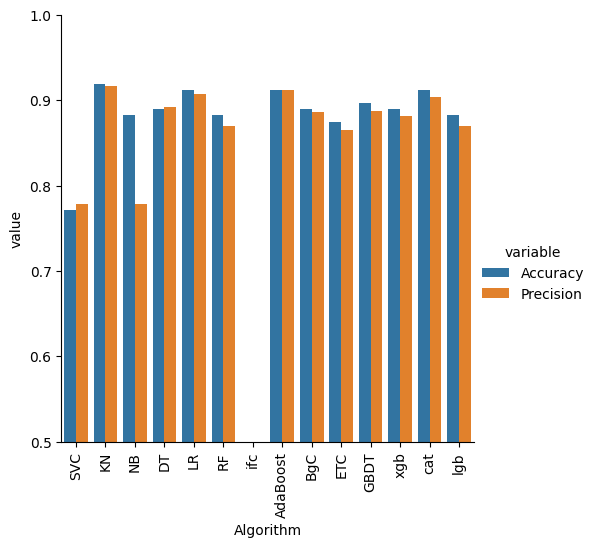

In [38]:
# Categorical Plot
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5) 
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
X = final_df.iloc[: , :11]
y = final_df.iloc[: , -1]

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
voting = VotingClassifier(estimators=[
    ('AdaBoost', abc),
    ('KN', knc),
    ('cat',cat)
],voting='soft')

In [47]:
voting.fit(X_train_trf , y_train)
y_pred = voting.predict(X_test_trf)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred))
print('Cross Val Score is ::',np.mean(cross_val_score(voting , X , y , scoring='accuracy' , cv = 5))) #85

Learning rate set to 0.175109
0:	learn: 0.6095490	total: 2.79ms	remaining: 137ms
1:	learn: 0.5463367	total: 4.66ms	remaining: 112ms
2:	learn: 0.4987047	total: 6.25ms	remaining: 98ms
3:	learn: 0.4601700	total: 7.87ms	remaining: 90.5ms
4:	learn: 0.4304117	total: 9.41ms	remaining: 84.7ms
5:	learn: 0.4019515	total: 10.3ms	remaining: 75.8ms
6:	learn: 0.3821320	total: 11.7ms	remaining: 72.1ms
7:	learn: 0.3642696	total: 13.1ms	remaining: 68.9ms
8:	learn: 0.3499192	total: 14.6ms	remaining: 66.7ms
9:	learn: 0.3360945	total: 15.8ms	remaining: 63.1ms
10:	learn: 0.3274360	total: 17.1ms	remaining: 60.6ms
11:	learn: 0.3176992	total: 18.6ms	remaining: 58.9ms
12:	learn: 0.3098309	total: 20.1ms	remaining: 57.2ms
13:	learn: 0.3015097	total: 21.5ms	remaining: 55.4ms
14:	learn: 0.2945209	total: 22.9ms	remaining: 53.5ms
15:	learn: 0.2883442	total: 24.3ms	remaining: 51.6ms
16:	learn: 0.2838811	total: 25.7ms	remaining: 49.9ms
17:	learn: 0.2785106	total: 27.1ms	remaining: 48.1ms
18:	learn: 0.2741958	total: 28

Learning rate set to 0.166513
0:	learn: 0.6164538	total: 1.85ms	remaining: 90.9ms
1:	learn: 0.5527100	total: 3.58ms	remaining: 85.8ms
2:	learn: 0.5016990	total: 5.13ms	remaining: 80.3ms
3:	learn: 0.4617386	total: 6.76ms	remaining: 77.8ms
4:	learn: 0.4298955	total: 8.43ms	remaining: 75.8ms
5:	learn: 0.3999154	total: 9.13ms	remaining: 67ms
6:	learn: 0.3771618	total: 10.4ms	remaining: 64.2ms
7:	learn: 0.3585331	total: 11.9ms	remaining: 62.5ms
8:	learn: 0.3431038	total: 13.4ms	remaining: 61.1ms
9:	learn: 0.3271100	total: 14.6ms	remaining: 58.3ms
10:	learn: 0.3163655	total: 16ms	remaining: 56.8ms
11:	learn: 0.3052614	total: 17.4ms	remaining: 55ms
12:	learn: 0.2974075	total: 18.7ms	remaining: 53.2ms
13:	learn: 0.2907296	total: 20.1ms	remaining: 51.7ms
14:	learn: 0.2834702	total: 22.1ms	remaining: 51.6ms
15:	learn: 0.2764671	total: 23.4ms	remaining: 49.7ms
16:	learn: 0.2703312	total: 24.7ms	remaining: 48ms
17:	learn: 0.2650747	total: 26.1ms	remaining: 46.4ms
18:	learn: 0.2597812	total: 27.4ms

In [49]:
from sklearn.ensemble import StackingClassifier

In [50]:
stacking = StackingClassifier(estimators=[
    ('AdaBoost', abc),
    ('GBDT',gbdt),
    ('KN', knc)
],final_estimator=cat)

In [51]:
stacking.fit(X_train_trf , y_train)
y_pred = stacking.predict(X_test_trf)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred))
print('Cross Val Score is ::',np.mean(cross_val_score(voting , X , y , scoring='accuracy' , cv = 5))) #0.8594557195571955

Learning rate set to 0.175109
0:	learn: 0.5957641	total: 2.67ms	remaining: 131ms
1:	learn: 0.5267142	total: 4.38ms	remaining: 105ms
2:	learn: 0.4756400	total: 6.04ms	remaining: 94.7ms
3:	learn: 0.4352951	total: 7.75ms	remaining: 89.1ms
4:	learn: 0.4054046	total: 9.33ms	remaining: 84ms
5:	learn: 0.3807671	total: 11.2ms	remaining: 82.3ms
6:	learn: 0.3616239	total: 12.9ms	remaining: 79.5ms
7:	learn: 0.3458589	total: 14.4ms	remaining: 75.5ms
8:	learn: 0.3335347	total: 15.8ms	remaining: 71.9ms
9:	learn: 0.3240516	total: 17.4ms	remaining: 69.5ms
10:	learn: 0.3156991	total: 19ms	remaining: 67.2ms
11:	learn: 0.3090309	total: 20.8ms	remaining: 65.7ms
12:	learn: 0.3042599	total: 22.3ms	remaining: 63.5ms
13:	learn: 0.2998531	total: 24.1ms	remaining: 61.9ms
14:	learn: 0.2964951	total: 26ms	remaining: 60.6ms
15:	learn: 0.2939678	total: 27.8ms	remaining: 59.1ms
16:	learn: 0.2914274	total: 28.6ms	remaining: 55.5ms
17:	learn: 0.2893397	total: 30.1ms	remaining: 53.5ms
18:	learn: 0.2878483	total: 31.9ms

Learning rate set to 0.166513
0:	learn: 0.6164538	total: 2.14ms	remaining: 105ms
1:	learn: 0.5527100	total: 3.57ms	remaining: 85.7ms
2:	learn: 0.5016990	total: 5.04ms	remaining: 78.9ms
3:	learn: 0.4617386	total: 6.37ms	remaining: 73.3ms
4:	learn: 0.4298955	total: 7.81ms	remaining: 70.3ms
5:	learn: 0.3999154	total: 8.44ms	remaining: 61.9ms
6:	learn: 0.3771618	total: 10.3ms	remaining: 63.4ms
7:	learn: 0.3585331	total: 12.2ms	remaining: 64ms
8:	learn: 0.3431038	total: 14.1ms	remaining: 64.1ms
9:	learn: 0.3271100	total: 15.5ms	remaining: 61.8ms
10:	learn: 0.3163655	total: 17.8ms	remaining: 63.2ms
11:	learn: 0.3052614	total: 19.4ms	remaining: 61.3ms
12:	learn: 0.2974075	total: 20.8ms	remaining: 59.1ms
13:	learn: 0.2907296	total: 22.1ms	remaining: 56.8ms
14:	learn: 0.2834702	total: 23.4ms	remaining: 54.7ms
15:	learn: 0.2764671	total: 25.2ms	remaining: 53.6ms
16:	learn: 0.2703312	total: 26.7ms	remaining: 51.8ms
17:	learn: 0.2650747	total: 28.1ms	remaining: 49.9ms
18:	learn: 0.2597812	total: 2